<a href="https://colab.research.google.com/github/devak23/python/blob/master/ml2/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with Tensorflow

In this notebook, we're going to learn how to write neural networks for classification problems.

A classification problem is where you try to classify something as one thing or another. A few types of classification are

* Binary
* Muticlass classification
* Multilable classficiation

# Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out the features
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

Our data is little hard to understand. Let's visualize it

In [23]:
import pandas as pd
circles  = pd.DataFrame({"X0": X[:,0], "X1":X[:,1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


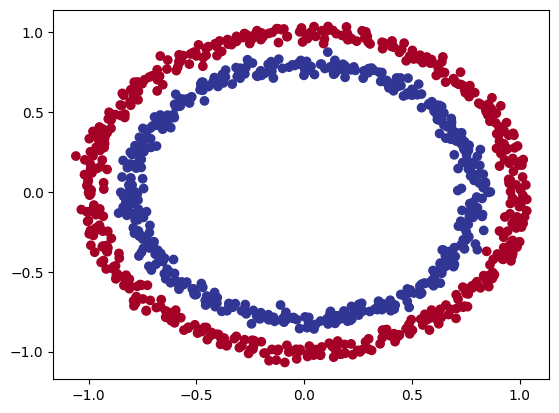

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

**Important:**

🏋 Before pushing forward. Spending 10 mins playing around [playground.tensorflow.org](https://playground.tensorflow.org/) building and running different neural networks. See what happens when you change different hyperparameters

## Input and Output Shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples are we working with ?
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [9]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.15.0'

In [10]:
tf.random.set_seed(42)

# 1. Create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
model1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.4833 - accuracy: 0.4920
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7185 - accuracy: 0.5030
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.5020
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4870


In [11]:
# Let's try and improve our model by training for longer...
model1.fit(X, y, epochs=200, verbose=0)
model1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a Binary Classfication problem and our model is getting 50% accuracy, its performing as if its guessing. So let's step up things a notch by adding an extra layer

In [12]:
# set seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
model2.fit(X, y, epochs=100, verbose=0)

# 4 Evaluate the model
model2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932617425918579, 0.5]

Even after adding another layer our model is still performing poorly with the same 50% accuracy :(

In [13]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

As you can see above, we have 500 samples of 1 and 500 samples of 0. Our model is not able to predict anything with accuracy.

## Improving our model

Let's look into our bag of tricks to see how we can improve our model

1. Create a model - we might want to add more layers or increase # of hidden units within a layer
2. Compiling a model - we might want to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit the model for more epochs leaving it for longer training.

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10),  # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 3. Fit the model
model3.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5130


[0.6960306763648987, 0.5130000114440918]

AND THAT DIDN'T DO ANYTHING!!!!

To visualize our model's prediction, let's create a function `plot_decision_boundary, this function will:

* Take in trained model, features (X) and labels (y)
* Create a meshgrid of different X values
* Make predictions across the meshgrid
* Plot the predictions as well as the line between zones where each unique class falls

In [16]:
import numpy as np

In [21]:
def plot_decision_boundary(model, X, y):
  """
  PLots the decision boundary created by a model predicting on X
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))

  # Create X value (We're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # chck for multiclass
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")

    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Doing binary classification


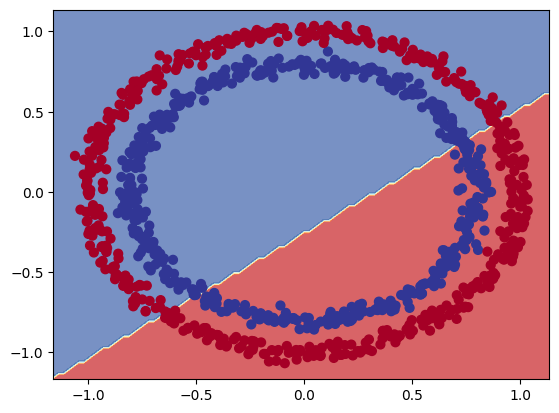

In [22]:
# Check out the predictions our model is making
plot_decision_boundary(model=model3, X=X, y=y)